In [6]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/PNEUMONIA")
print(p)
count = 0
count2 = 0
image_data = []
labels = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data.append(img_array) #Append the numerical representation of the image to an array
    labels.append(1)#The label list appends the label of that particular instance
    count = count +1
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data.append(img_array) #Append the numerical representation of the image to an array
    labels.append(0)#The label list appends the label of that particular instance
    count2 = count2 +1
print(len(labels))
print(len(image_data))

#convert data to numpy array 
image_data = np.array(image_data, dtype='float32')/255.0 #Why do we need this? 
labels = np.array(labels)
#192*192 is the size
print(image_data.shape, labels.shape) #This means it is a four dimensional?

## Randomly shuffle data



train/PNEUMONIA
3877
3877
(3877, 192, 192, 3) (3877,)


In [7]:
images_copy = []
for that_image in image_data: #taking data for each image
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy.append(image_data_copy)

print(len(images_copy))
print(images_copy[100])
print(image_data[100])

images_copy = np.array(images_copy, dtype='float32')

from numpy import clip

for k in range(50,55):
    print(images_copy[k].mean())
for pix in range (len(images_copy)):
    pixelline = images_copy[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
   
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
    
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy[pix] = pixelline
    
for l in range(50,55):
    print(images_copy[l].mean())

3877
[0.23921569 0.24313726 0.2509804  ... 0.26666668 0.24313726 0.21960784]
[[[0.23921569 0.23921569 0.23921569]
  [0.24313726 0.24313726 0.24313726]
  [0.2509804  0.2509804  0.2509804 ]
  ...
  [0.13725491 0.13725491 0.13725491]
  [0.14509805 0.14509805 0.14509805]
  [0.14117648 0.14117648 0.14117648]]

 [[0.23921569 0.23921569 0.23921569]
  [0.24313726 0.24313726 0.24313726]
  [0.24705882 0.24705882 0.24705882]
  ...
  [0.14117648 0.14117648 0.14117648]
  [0.14901961 0.14901961 0.14901961]
  [0.13333334 0.13333334 0.13333334]]

 [[0.24313726 0.24313726 0.24313726]
  [0.24313726 0.24313726 0.24313726]
  [0.23529412 0.23529412 0.23529412]
  ...
  [0.14509805 0.14509805 0.14509805]
  [0.13725491 0.13725491 0.13725491]
  [0.1254902  0.1254902  0.1254902 ]]

 ...

 [[0.09411765 0.09411765 0.09411765]
  [0.10196079 0.10196079 0.10196079]
  [0.10980392 0.10980392 0.10980392]
  ...
  [0.26666668 0.26666668 0.26666668]
  [0.24313726 0.24313726 0.24313726]
  [0.23137255 0.23137255 0.23137255]

In [8]:

import random 
combined = list(zip(images_copy, labels))
random.shuffle(combined)

images_copy[:], labels[:] = zip(*combined)


print(images_copy.shape)
print(labels.shape)
from sklearn import svm
# Train SVM and get train accuracy 

svm_classifier = svm.SVC(kernel='linear', C=1.0) #learning rate =1 
svm_classifier.fit(images_copy, labels)
ypred_sklearn = svm_classifier.predict(images_copy)
svm_classifier.score(images_copy,labels)

(3877, 36864)
(3877,)


0.7859169460923394

val/PNEUMONIA
36
36
(36, 192, 192, 3) (36,)


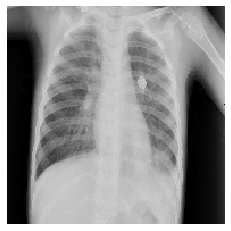

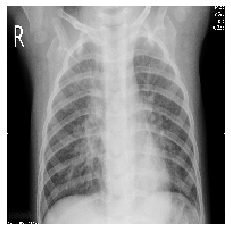

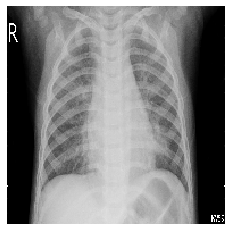

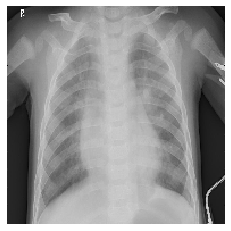

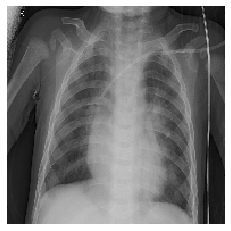

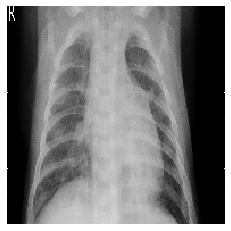

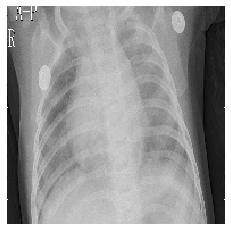

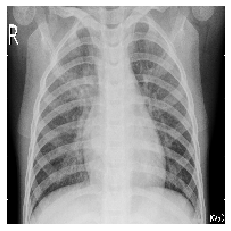

In [14]:
p = Path("val/PNEUMONIA")
print(p)
count = 0
count2 = 0
image_data2 = []
labels2 = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data2.append(img_array) #Append the numerical representation of the image to an array
    labels2.append(1)#The label list appends the label of that particular instance
    count = count +1
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data2.append(img_array) #Append the numerical representation of the image to an array
    labels2.append(0)#The label list appends the label of that particular instance
    count2 = count2 +1
print(len(labels2))
print(len(image_data2))


#convert data to numpy array 
image_data2 = np.array(image_data2, dtype='float32')/255.0 #Why do we need this? 
labels2 = np.array(labels2)
#192*192 is the size
print(image_data2.shape, labels2.shape) #This means it is a four dimensional?




def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(8):
    drawImg(image_data2[i])
## Data conversion for One vs One classification




[0.41568628 0.32941177 0.29803923 ... 0.1254902  0.18039216 0.25882354]
[[[0.41568628 0.41568628 0.41568628]
  [0.32941177 0.32941177 0.32941177]
  [0.29803923 0.29803923 0.29803923]
  ...
  [0.5568628  0.5568628  0.5568628 ]
  [0.69411767 0.69411767 0.69411767]
  [0.8117647  0.8117647  0.8117647 ]]

 [[0.45490196 0.45490196 0.45490196]
  [0.45490196 0.45490196 0.45490196]
  [0.39215687 0.39215687 0.39215687]
  ...
  [0.54509807 0.54509807 0.54509807]
  [0.7137255  0.7137255  0.7137255 ]
  [0.7882353  0.7882353  0.7882353 ]]

 [[0.28627452 0.28627452 0.28627452]
  [0.3019608  0.3019608  0.3019608 ]
  [0.42745098 0.42745098 0.42745098]
  ...
  [0.6117647  0.6117647  0.6117647 ]
  [0.7176471  0.7176471  0.7176471 ]
  [0.827451   0.827451   0.827451  ]]

 ...

 [[0.10980392 0.10980392 0.10980392]
  [0.09411765 0.09411765 0.09411765]
  [0.08627451 0.08627451 0.08627451]
  ...
  [0.13725491 0.13725491 0.13725491]
  [0.18431373 0.18431373 0.18431373]
  [0.28235295 0.28235295 0.28235295]]

 [

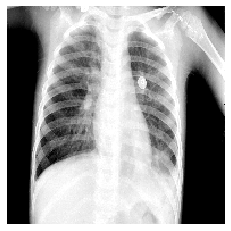

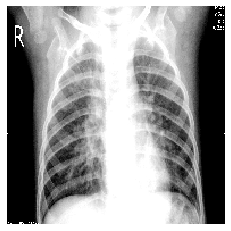

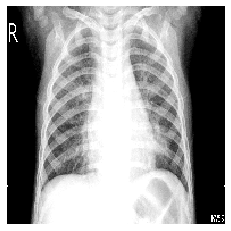

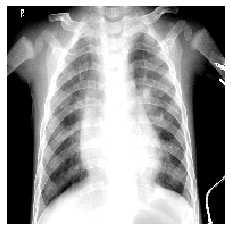

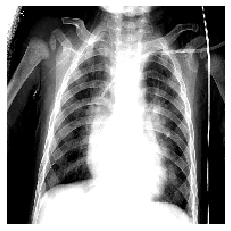

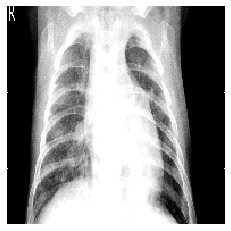

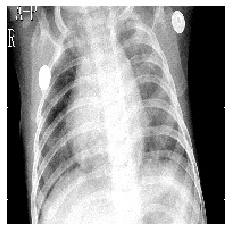

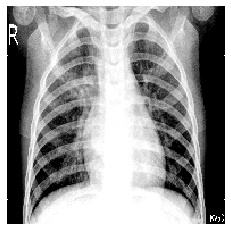

In [15]:
images_copy2 = []
for that_image in image_data2: #taking data for each image
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy2.append(image_data_copy)

images_copy2 = np.array(images_copy2, dtype='float32')

print(images_copy2[32])
print(image_data2[32])

    
from numpy import clip
j = 0
for k in range(5,10):
    print(images_copy2[k].mean())
for pix in range (len(images_copy2)):
    pixelline = images_copy2[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
   
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
   
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy2[pix] = pixelline
    i = 0
    for row in range(len(image_data2[j])):#192
        for col in range(len(image_data2[j][row])):#192
            for rgb in range(len(image_data2[j][row][col])):#3
                image_data2[j][row][col][rgb] = pixelline[i]
            i = i+1 #should update 36000 times for the whole picture
    j = j+1
for l in range(5,10):
    print(images_copy2[l].mean())

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(8):
    drawImg(image_data2[i])

In [16]:
## Randomly shuffle data

import random 
combined = list(zip(images_copy2, labels2))
random.shuffle(combined)

images_copy2[:], labels2[:] = zip(*combined)
## Visualize the data
print(images_copy2.shape)
print(labels2.shape)
ypred_sklearn = svm_classifier.predict(images_copy2)
svm_classifier.score(images_copy2,labels2)

(36, 36864)
(36,)


0.6944444444444444

In [17]:
p = Path("test/PNEUMONIA")
print(p)
image_data3 = []
labels3 = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data3.append(img_array) #Append the numerical representation of the image to an array
    labels3.append(1)#The label list appends the label of that particular instance
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data3.append(img_array) #Append the numerical representation of the image to an array
    labels3.append(0)#The label list appends the label of that particular instance
print(len(labels3))



#convert data to numpy array 
image_data3 = np.array(image_data3, dtype='float32')/255.0 #Why do we need this? 
labels3 = np.array(labels3)
#192*192 is the size
print(image_data3.shape, labels3.shape) #This means it is a four dimensional?
print(image_data3[4]) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 





test/PNEUMONIA
409
409
(409, 192, 192, 3) (409,)
[[[0.46666667 0.46666667 0.46666667]
  [0.46666667 0.46666667 0.46666667]
  [0.46666667 0.46666667 0.46666667]
  ...
  [0.         0.         0.        ]
  [0.5058824  0.5058824  0.5058824 ]
  [0.49411765 0.49411765 0.49411765]]

 [[0.46666667 0.46666667 0.46666667]
  [0.4862745  0.4862745  0.4862745 ]
  [0.48235294 0.48235294 0.48235294]
  ...
  [0.50980395 0.50980395 0.50980395]
  [0.44313726 0.44313726 0.44313726]
  [0.4627451  0.4627451  0.4627451 ]]

 [[0.48235294 0.48235294 0.48235294]
  [0.47843137 0.47843137 0.47843137]
  [0.4509804  0.4509804  0.4509804 ]
  ...
  [0.5019608  0.5019608  0.5019608 ]
  [0.47058824 0.47058824 0.47058824]
  [0.47058824 0.47058824 0.47058824]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         

In [18]:
images_copy3 = []

for that_image in image_data3: #taking data for each image, converts it to single row
    image_data_copy = [] #The pixel data for that image
    for row in that_image: 
        for column in row: #Each pixel
            image_data_copy.append(column) #Column is a triplet of identical RGB - should be 36864
    image_data_copy = np.array(image_data_copy, dtype='float32')
    image_data_copy = image_data_copy[:, 0]
    images_copy3.append(image_data_copy)
print(image_data_copy.shape)
print(images_copy3[100])
print(image_data3[100])

images_copy3 = np.array(images_copy3, dtype='float32')

from numpy import clip

for k in range(45,50):
    print(images_copy3[k].mean())
for pix in range (len(images_copy3)):
    pixelline = images_copy3[pix]
    mean, std = pixelline.mean(), pixelline.std()
   
    pixelline = (pixelline - mean)/std
    
    pixelline = clip(pixelline, -1.0, 1.0)
    pixelline = (pixelline + 1.0)/2.0
   
    #Convert each value of the triplet to the normalized value in the pixelline - this is an
    #experiment
    images_copy3[pix] = pixelline
    
    
for l in range(45,50):
    print(images_copy3[l].mean())
    

(36864,)
[0.05882353 0.09019608 0.11372549 ... 0.         0.         0.        ]
[[[0.05882353 0.05882353 0.05882353]
  [0.09019608 0.09019608 0.09019608]
  [0.11372549 0.11372549 0.11372549]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.05882353 0.05882353 0.05882353]
  [0.07843138 0.07843138 0.07843138]
  [0.10588235 0.10588235 0.10588235]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.05882353 0.05882353 0.05882353]
  [0.07058824 0.07058824 0.07058824]
  [0.09411765 0.09411765 0.09411765]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.00392157 0.00392

In [19]:
import random 
combined = list(zip(images_copy3, labels3))
random.shuffle(combined)

images_copy3[:], labels3[:] = zip(*combined)


print(images_copy3.shape)
print(labels3.shape)
ypred_sklearn = svm_classifier.predict(images_copy3)
svm_classifier.score(images_copy3, labels3)

(409, 36864)
(409,)


0.60880195599022